In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.shape

(1000, 8)

In [3]:
def class_grade(scores):
    if scores >= 90 and scores <= 100:
        return 5
    elif scores >= 75 and scores < 90:
        return 4
    elif scores >= 60 and scores < 75:
        return 3
    elif scores >= 0 and scores < 60:
        return 2

In [4]:
df['mean score'] = (df['math score']+df['reading score']+df['writing score'])/3
df['grade'] = df['mean score'].apply(class_grade)

In [5]:
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'female' else 1)
df['test preparation course'] = df['test preparation course'].apply(lambda x: 0 if x == 'none' else 1)
df['lunch'] = df['lunch'].apply(lambda x: 0 if x == 'free/reduced' else 1)

In [6]:
race_column = {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
parental_level_of_education_column = {'high school': 0, 'some high school': 1, 'some college': 2, "associate's degree": 3, 
                                      "bachelor's degree": 4, "master's degree": 5}
df['race/ethnicity'] = df['race/ethnicity'].map(race_column)

In [7]:
df['parental level of education'] = df['parental level of education'].map(parental_level_of_education_column)

In [8]:
df['math score'] = df['math score']/100
df['reading score'] = df['reading score']/100
df['writing score'] = df['writing score']/100

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,grade
0,0,1,4,1,0,0.72,0.72,0.74,72.666667,3
1,0,2,2,1,1,0.69,0.90,0.88,82.333333,4
2,0,1,5,1,0,0.90,0.95,0.93,92.666667,5
3,1,0,3,0,0,0.47,0.57,0.44,49.333333,2
4,1,2,2,1,0,0.76,0.78,0.75,76.333333,4


In [10]:
X = df.drop(['mean score', 'grade'], 1)
y = df['grade']

In [11]:
scaler = StandardScaler()

X_sc = scaler.fit_transform(X)

## Dimensionality reduction

In [12]:
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_sc)

Text(0.5, 1.0, 'TSNE')

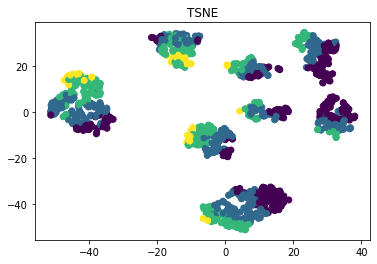

In [13]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('TSNE')

In [14]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_sc)

Text(0.5, 1.0, 'PCA')

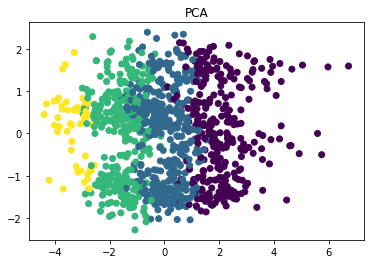

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

In [16]:
pca.explained_variance_ratio_

array([0.38270228, 0.148184  ])

In [17]:
pca.singular_values_

array([55.33189155, 34.43068377])

In [18]:
import umap.umap_ as umap

In [19]:
umap_2d = umap.UMAP(n_components=2, random_state=0)
X_umap = umap_2d.fit_transform(X_sc)

Text(0.5, 1.0, 'umap')

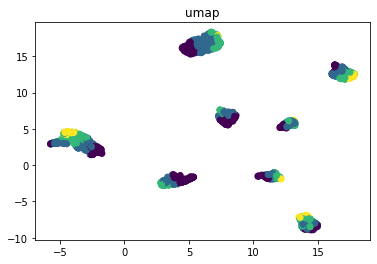

In [20]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)
plt.title('umap')

## Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [22]:
img = plt.imread('lab3.jpg')
img = img/255
img.shape

(422, 600, 3)

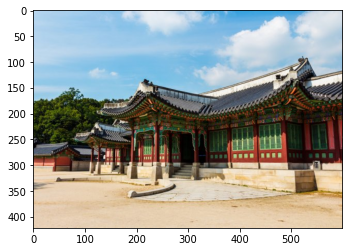

In [23]:
plt.imshow(img)

In [24]:
n_colors = [64, 32, 16, 8]

In [25]:
w, h, d = img.shape

In [26]:
img_array = img.reshape(w*h, d)

In [27]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [28]:
img_array_sample = shuffle(img_array, random_state=0, n_samples=1000)

Wall time: 1.78 s


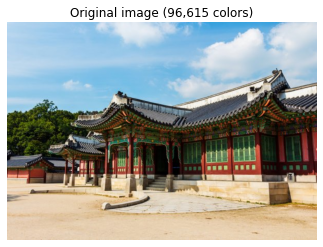

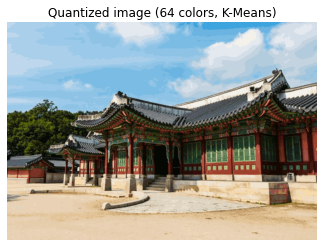

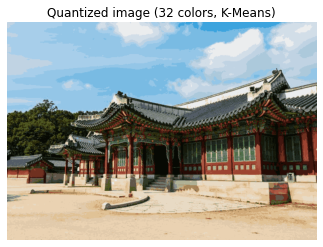

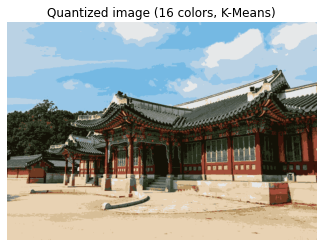

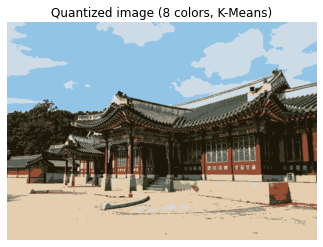

In [29]:
%%time

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(img)

img_array_sample = shuffle(img_array, random_state=0, n_samples=1000)
k = 2
for n in n_colors:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(img_array_sample)
    labels = kmeans.predict(img_array)
    plt.figure(k)
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image ({n} colors, K-Means)')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    k += 1

## EM-algorithm

In [30]:
mean1 = [-3, 0]
cov1 = [[2, -1], 
        [-1, 1]]

mean2 = [-5, 6]
cov2 = [[1, 0], 
        [0, 2.5]]

In [31]:
x1 = np.random.multivariate_normal(mean1, cov1, 500)
x2 = np.random.multivariate_normal(mean2, cov2, 500)

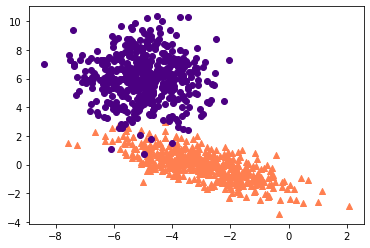

In [32]:
plt.scatter(x1[:, 0], x1[:, 1], marker = '^', color='coral')
plt.scatter(x2[:, 0], x2[:, 1], marker = 'o', color='indigo')

In [33]:
X = np.concatenate([x1, x2])
#y = np.array([0]*500 + [1]*500)

idx = np.arange(len(X))
np.random.shuffle(idx)
X = X[idx]
#y = y[idx]

In [34]:
from sklearn.mixture import GaussianMixture

In [35]:
model = GaussianMixture(n_components=2)
model.fit(X)

GaussianMixture(n_components=2)

In [36]:
model.means_

array([[-2.98171853, -0.01145957],
       [-4.9483163 ,  6.06945143]])

In [37]:
model.covariances_

array([[[ 2.09534544, -1.05628624],
        [-1.05628624,  1.03196046]],

       [[ 1.02403715, -0.0397857 ],
        [-0.0397857 ,  2.59461763]]])

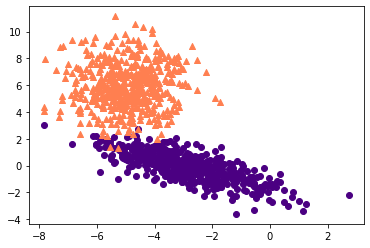

In [38]:
x1_new = np.random.multivariate_normal(model.means_[0], model.covariances_[0], 500)
x2_new = np.random.multivariate_normal(model.means_[1], model.covariances_[1], 500)

plt.scatter(x1_new[:, 0], x1_new[:, 1], marker = 'o', color='indigo')
plt.scatter(x2_new[:, 0], x2_new[:, 1], marker = '^', color='coral')

## Text data

In [39]:
df = pd.read_csv('tweets.csv')

In [40]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [41]:
df.shape

(14640, 15)

In [42]:
df = df[['airline_sentiment', 'text']]
df['text_copy'] = df['text']
df.head()

,airline_sentiment,text,text_copy
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

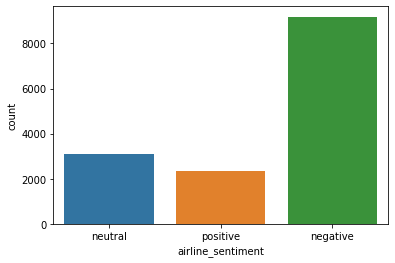

In [43]:
sns.countplot(x='airline_sentiment', data=df)

In [44]:
df.airline_sentiment.value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [45]:
label_encoder = LabelEncoder()
df.airline_sentiment = label_encoder.fit_transform(df.airline_sentiment)
df.head()

,airline_sentiment,text,text_copy
0,1,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...


In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

In [47]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Helen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
stop_words = stopwords.words('english')

In [49]:
def cleaning_porter(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'https?:*/+[a-zA-Z0-9./]*', '', text)
    text = re.sub(r'[,!?;-]', '.', text)
    clean_text = []
    stemmer = PorterStemmer()
    for word in word_tokenize(text):
        if word not in stop_words and word.isalpha():
            word = stemmer.stem(word)
            clean_text.append(word)
    return ' '.join(clean_text) 

def cleaning_snowball(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'https?:*/+[a-zA-Z0-9./]*', '', text)
    text = re.sub(r'[,!?;-]', '.', text)
    clean_text = []
    stemmer = SnowballStemmer(language='english')
    for word in word_tokenize(text):
        if word not in stop_words and word.isalpha():
            word = stemmer.stem(word)
            clean_text.append(word)
    return ' '.join(clean_text) 

In [50]:
df.text = df.text.apply(cleaning_porter)
df.text_copy = df.text_copy.apply(cleaning_snowball)

In [51]:
df.head(10)

,airline_sentiment,text,text_copy
0,1,said,said
1,2,plu ad commerci experi tacki,plus ad commerci experi tacki
2,1,today must mean need take anoth trip,today must mean need take anoth trip
3,0,realli aggress blast obnoxi entertain guest fa...,realli aggress blast obnoxi entertain guest fa...
4,0,realli big bad thing,realli big bad thing
5,0,serious would pay flight seat play realli bad ...,serious would pay flight seat play realli bad ...
6,2,ye nearli everi time fli vx ear worm go away,yes near everi time fli vx ear worm go away
7,1,realli miss prime opportun men without hat parodi,realli miss prime opportun men without hat parodi
8,2,well,well
9,2,amaz arriv hour earli good,amaz arriv hour earli good


In [52]:
X = df.text
X1 = df.text_copy
y = df.airline_sentiment

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## CountVectorizer

In [55]:
def count_vectorizer(X_train, X_test, y_train, y_test, mode='features'):
    if mode == 'features':
        n_features = 1000 
        count_vectorizer = CountVectorizer(max_features=n_features, stop_words='english')
        train_count_vectorizer = count_vectorizer.fit_transform(X_train)
        test_count_vectorizer = count_vectorizer.transform(X_test)
    
        clf = LogisticRegression(random_state=0).fit(train_count_vectorizer, y_train)
        y_pred = clf.predict(test_count_vectorizer)
    
    elif mode == 'ngrams':
        count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
        train_count_vectorizer = count_vectorizer.fit_transform(X_train)
        test_count_vectorizer = count_vectorizer.transform(X_test)

        clf = LogisticRegression(random_state=0).fit(train_count_vectorizer, y_train)
        y_pred = clf.predict(test_count_vectorizer)
        
    else:
        print('not a valid mode, choose features or ngrams')
        return 0
    
    return y_pred

In [56]:
y_pred_features = count_vectorizer(X_train, X_test, y_train, y_test, mode='features')
y_pred1_features = count_vectorizer(X1_train, X1_test, y1_train, y1_test, mode='features')

y_pred_ngrams = count_vectorizer(X_train, X_test, y_train, y_test, mode='ngrams')
y_pred1_ngrams = count_vectorizer(X1_train, X1_test, y1_train, y1_test, mode='ngrams')

In [57]:
print('\033[1m' + 'Porter Stemmer with features mode:\n' + '\033[0m')
print(classification_report(y_pred_features, y_test, digits=4))

print('\033[1m' + '\nSnowball Stemmer with features mode:\n' + '\033[0m')
print(classification_report(y_pred1_features, y1_test, digits=4))

print('\033[1m' + '\nPorter Stemmer with ngrams mode:\n' + '\033[0m')
print(classification_report(y_pred_ngrams, y_test, digits=4))

print('\033[1m' + '\nSnowball Stemmer with ngrams mode:\n' + '\033[0m')
print(classification_report(y_pred1_ngrams, y1_test, digits=4))

Porter Stemmer with features mode:

              precision    recall  f1-score   support

           0     0.8826    0.8328    0.8569      2942
           1     0.5249    0.6081    0.5635       814
           2     0.6523    0.6903    0.6707       636

    accuracy                         0.7705      4392
   macro avg     0.6866    0.7104    0.6970      4392
weighted avg     0.7829    0.7705    0.7756      4392


Snowball Stemmer with features mode:

              precision    recall  f1-score   support

           0     0.8892    0.8340    0.8607      2915
           1     0.5608    0.6250    0.5912       856
           2     0.6562    0.7440    0.6974       621

    accuracy                         0.7805      4392
   macro avg     0.7021    0.7343    0.7164      4392
weighted avg     0.7922    0.7805    0.7851      4392


Porter Stemmer with ngrams mode:

              precision    recall  f1-score   support

           0     0.8945    0.8302    0.8611      2991
           1     0.

## TFIDF

In [58]:
def tfidf(X_train, X_test, y_train, y_test):
    tfidf_vectorizer = TfidfVectorizer()

    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test =  tfidf_vectorizer.transform(X_test)

    clf = LogisticRegression().fit(tfidf_train, y_train)

    y_pred = clf.predict(tfidf_test)
    
    return y_pred

In [59]:
y_pred_tfidf = tfidf(X_train, X_test, y_train, y_test)
y_pred1_tfidf = tfidf(X1_train, X1_test, y1_train, y1_test)

In [60]:
print('\033[1m' + 'Porter Stemmer:\n' + '\033[0m')
print(classification_report(y_pred_tfidf, y_test, digits=4))

print('\033[1m' + '\nSnowball Stemmer:\n' + '\033[0m')
print(classification_report(y_pred1_tfidf, y1_test, digits=4))

Porter Stemmer:

              precision    recall  f1-score   support

           0     0.9362    0.8032    0.8646      3236
           1     0.4486    0.6757    0.5392       626
           2     0.6152    0.7811    0.6883       530

    accuracy                         0.7823      4392
   macro avg     0.6667    0.7533    0.6974      4392
weighted avg     0.8280    0.7823    0.7969      4392


Snowball Stemmer:

              precision    recall  f1-score   support

           0     0.9389    0.7918    0.8591      3242
           1     0.4413    0.6768    0.5343       622
           2     0.5966    0.7955    0.6818       528

    accuracy                         0.7760      4392
   macro avg     0.6589    0.7547    0.6917      4392
weighted avg     0.8273    0.7760    0.7918      4392



## WordCloud

In [61]:
from wordcloud import WordCloud

In [62]:
def visualize(label):
    text = ''
    for msg in df[df['airline_sentiment'] == label]['text']:
        #msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

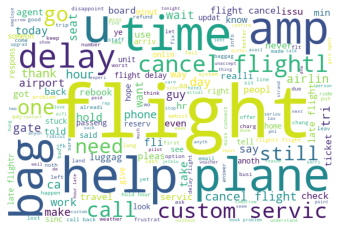

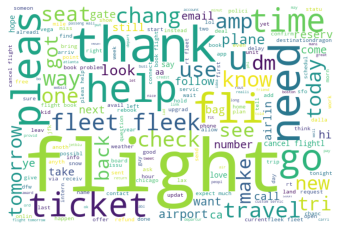

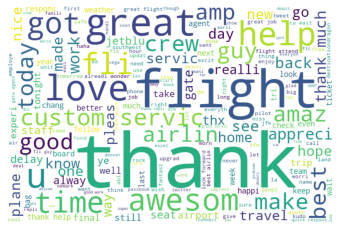

In [63]:
visualize(0)  # negative
visualize(1)  # neutral
visualize(2)  # positive

## Topic modeling

In [64]:
from sklearn.decomposition import LatentDirichletAllocation

In [65]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [66]:
n_components = 4
n_top_words = 10

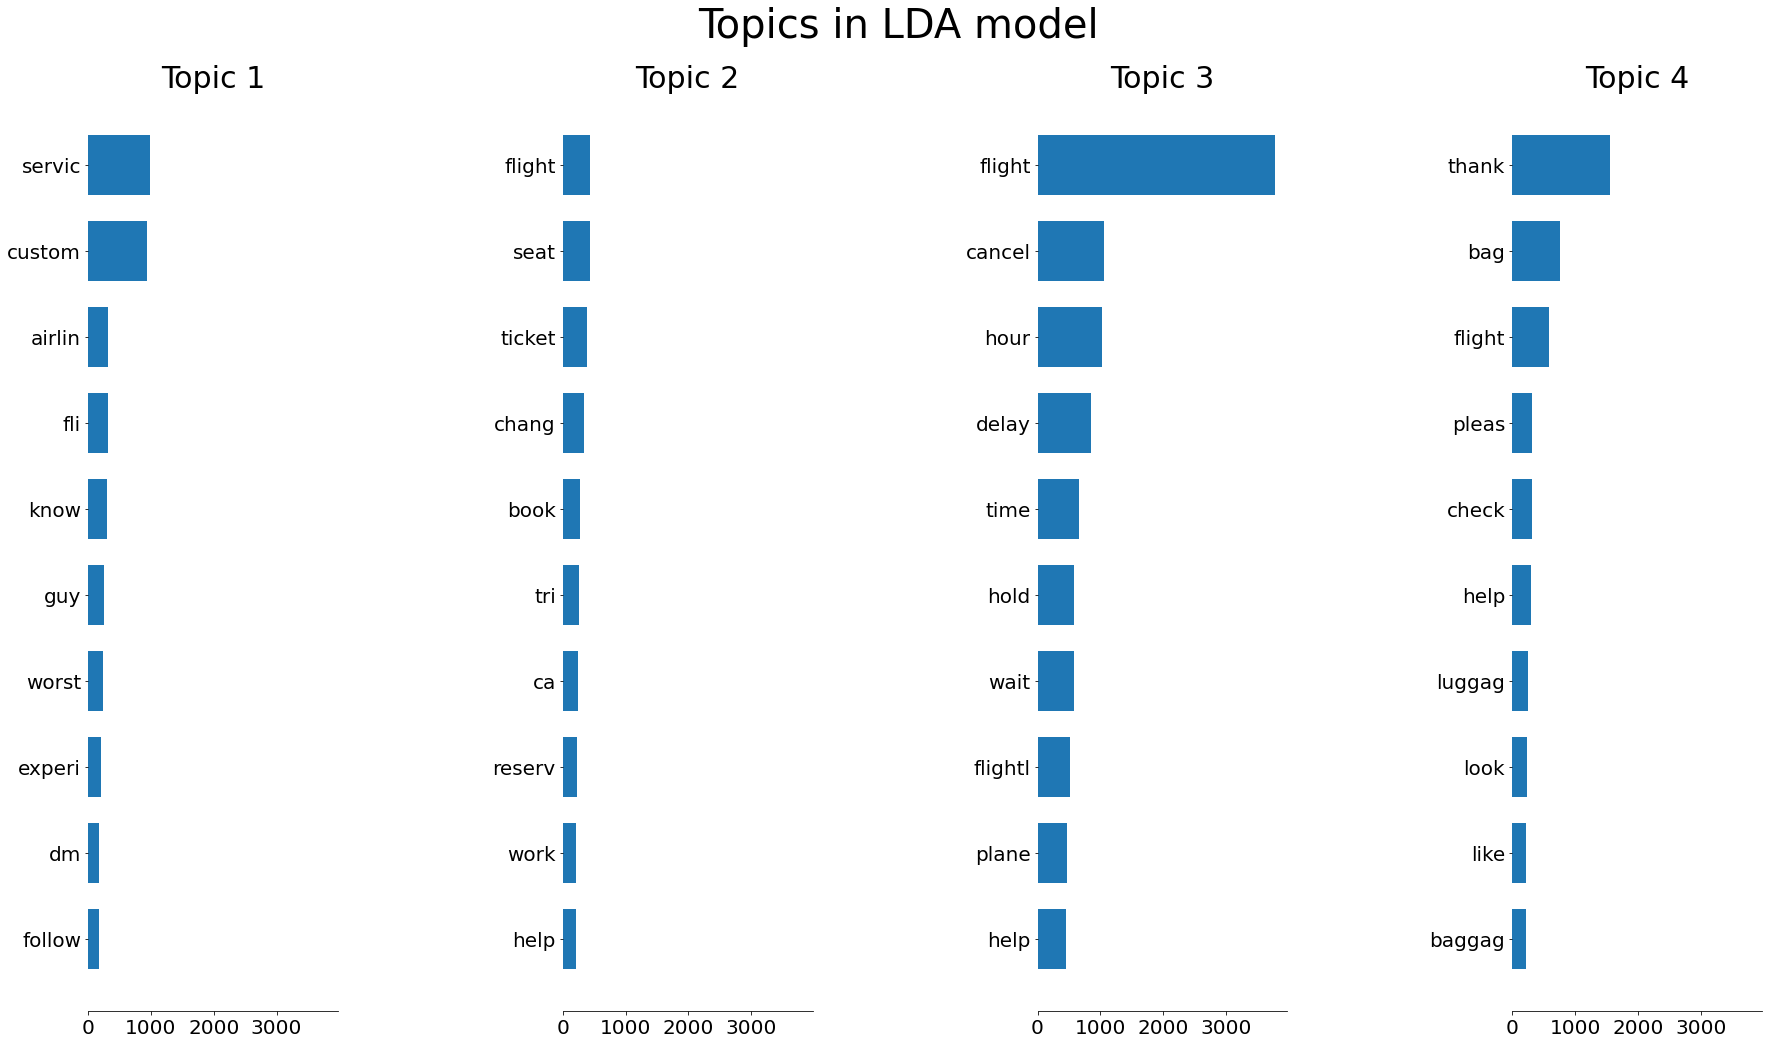

In [67]:
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(X)

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')